In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import time
import matplotlib.pyplot as plt

# Fundamental orbits

Application of the clipping method to the collection of orbits found via numerical optimization
provided us with a handful of fundamental orbits; upon inspection it turns out that
only three were unique, the rest lie in the continuous families generated by numerical continuation.

In [4]:
tile_dir = '../../data/ks/tiles/original/'
s = read_h5('EquilibriumOrbitKS_L6p390.h5', directory=tile_dir, basis='field')
w = read_h5('AntisymmetricOrbitKS_T17p150_L17p591.h5', directory=tile_dir, basis='field')
m = read_h5('RelativeOrbitKS_T15p855_L13p026.h5', directory=tile_dir, basis='field')

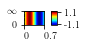

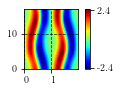

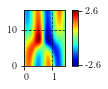

In [7]:
_ = s.plot(fundamental_domain=False), w.plot(fundamental_domain=False), m.plot()

The claim is that these represent the fundamental patterns of the Kuramoto-Sivashinsky equation. How fundamental
are these patterns, truly? 

In [ ]:
# scont = s.copy()
# scont = discretization_continuation(scont, (1, 256)).orbit

# energy = []
# lengths = np.arange(7, 256, 0.1)
# for Lcont in lengths:
#     scont = dimension_continuation(scont.transform(to='modes'), Lcont, axis=1,
#                                    step_size=0.1, method='lstsq').orbit
#     energy.append(np.sum(scont.transform(to='field').state[0,:]**2))

# scont.plot()

# fig = plt.figure()
# # plt.plot(lengths, norms)
# # plt.plot(lengths, absmax)
# plt.plot(lengths, energy)
# plt.show()

# field_mag = np.abs(m.transform(to='field').state).max()
# s12r = convert_class(s12.rescale(field_mag).reshape(32,32), OrbitKS)
# s13r = convert_class(s13.rescale(field_mag).reshape(32,32), OrbitKS).cell_shift(4, axis=1)

# half_wiggle_streak = dimension_continuation(s.transform(to='modes'),  w.L/2, axis=1, step_size=0.1, 
#                        method='lstsq').orbit.reshape(32,32)
# slanted_streak = convert_class(half_wiggle_streak, RelativeOrbitKS)
# slanted = slanted_streak.rotate(0.1, axis=1)
# slanted.T = w.T / 4
# slanted.S = -pi*np.sqrt(2)/2
# slanted = slanted.rotate(0.01, axis=1)
# slanted.reflection().plot(fundamental_domain=True)
# slanted.plot(fundamental_domain=True)

# wfd_from_s = glue(np.array([[slanted.change_reference_frame(to='physical')],
#                [slanted.reflection().change_reference_frame(to='physical')]]), OrbitKS)

# s2w = glue(np.array([[wfd_from_s.reflection(), wfd_from_s]]), OrbitKS)

# s2w.plot(filename='s2w_short.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# # s2w.plot(filename='s2w_middle.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# # s2w.plot(filename='s2w_long.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')

# s2w_result =  converge(convert_class(s2w.rescale(5).reshape(16,16).reshape(32,16).transform(to='modes'), 
#                                      AntisymmetricOrbitKS), method='hybrid', 
#                                      preconditioning=True, pexp=(1,4), verbose=True) 

# s2w_result.orbit.plot()

# s2w_result.orbit.plot(filename='s2w_short_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# # s2w_result.orbit.plot(filename='s2w_middle_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')
# # s2w_result.orbit.plot(filename='s2w_long_result.pdf', directory='../../data/local/orbithunter_thesis/fundamental/')

# s12r.plot(fundamental_domain=False)

# s13r.plot(fundamental_domain=False)

# defect_from_streaks = glue(np.array([[s12r],[s13r]]),
#                            RelativeOrbitKS,
#                            frame='physical')
# defect_from_streaks.T = m.T

# defect_from_streaks = defect_from_streaks.change_reference_frame(to='comoving')

# s2d = defect_from_streaks.reshape(16,16).reshape(32,16).transform(to='modes')

# s2d.plot(fundamental_domain=True)

# s2d.plot(filename='s2d_initial.pdf', directory='../../data/local/orbithunter_thesis/fundamental/', fundamental_domain=True)

# d_from_s_result =  converge(s2d, method='hybrid', preconditioning=True, pexp=(1,4), verbose=True) 

# d_from_s_result.orbit.plot(filename='s2d_final.pdf', directory='../../data/local/orbithunter_thesis/fundamental/', fundamental_domain=True)